- Learning time series data forecasting with ARIMA & SARIMAX
- learning video: https://www.youtube.com/watch?v=O5pataOw33Y

## Time series with ARIMA & SARIMAX


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# sns.get_dataset_names()  # check available dataset
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [14]:
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth', inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

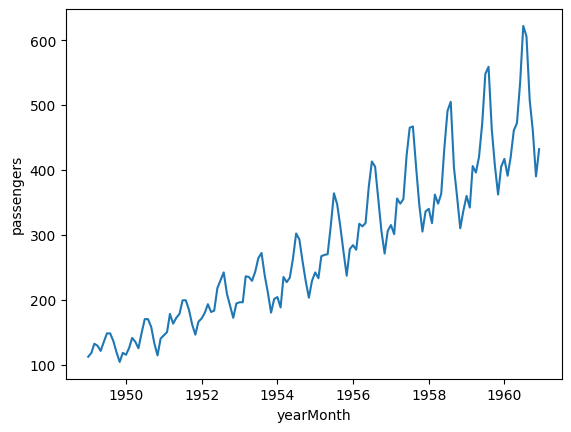

In [15]:
sns.lineplot(data=df, x=df.index, y='passengers')

#### Check data stationary

- Use Augmented Dickey-Fuller Test (ADF) for check stationary
- Stationary IF - **Test Statistics < critical values** 
- Not Stationary IF - **Test Statistics > critical values**

In [16]:
df['rolling_mean'] = df['passengers'].rolling(window=12).mean()
df['rolling_std'] = df['passengers'].rolling(window=12).std()

<Axes: xlabel='yearMonth', ylabel='passengers'>

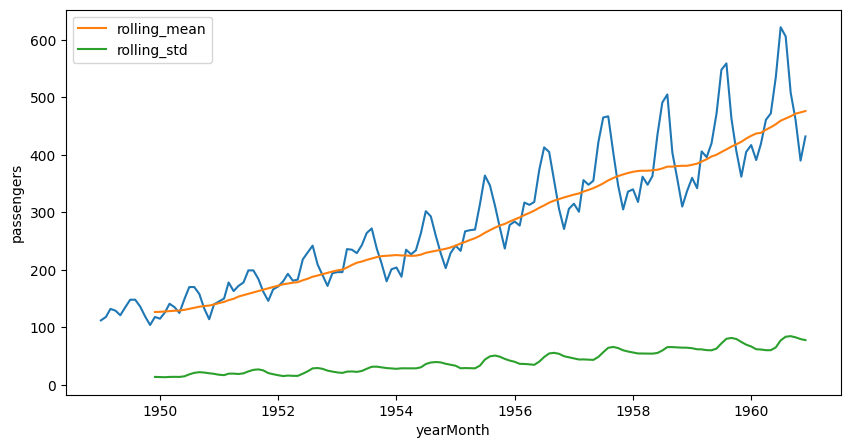

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y='passengers')
sns.lineplot(data=df, x=df.index, y='rolling_mean', label='rolling_mean')
sns.lineplot(data=df, x=df.index, y='rolling_std', label='rolling_std')

- Orange - mean, Green - std <br>
- Std is approximately stationary in which approximately constant to the timeline
- Mean is not stationary, not constant to the timeline

In [23]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller (df['passengers'], autolag='AIC')
adfTest

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [24]:
stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of Observations Used    130.000000
dtype: float64

In [28]:
for key, value in adfTest[4].items():
    print('critical value %s: %f' % (key, value))

critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770


- Not stationary as Test statistic < critical value

#### Make data stationary
- **Method**: Time shift, Log, Square Root, CubeRoot...
- Perform those method to the *passengers* column
- Basically is try on different method ways and even can combine the methods multiplely to obtain stationary data
- If data is stationary can proceed to next step

In [48]:
def test_stationary(df,var):
    df["rolling_mean"] = df[var].rolling(window=12).mean()
    df["rolling_std"] = df[var].rolling(window=12).std()

    adfTest = adfuller(df[var], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    print(stats)
    
    for key, value in adfTest[4].items():
        print('critical value %s: %f' % (key, value))
    
    sns.lineplot(data=df, x=df.index, y=var)
    sns.lineplot(data=df, x=df.index, y='rolling_mean', label='rolling_mean')
    sns.lineplot(data=df, x=df.index, y='rolling_std', label='rolling_std')


Test Statistic                   0.815369
p-value                          0.991880
Lags Used                       13.000000
Number of Observations Used    130.000000
dtype: float64
critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770


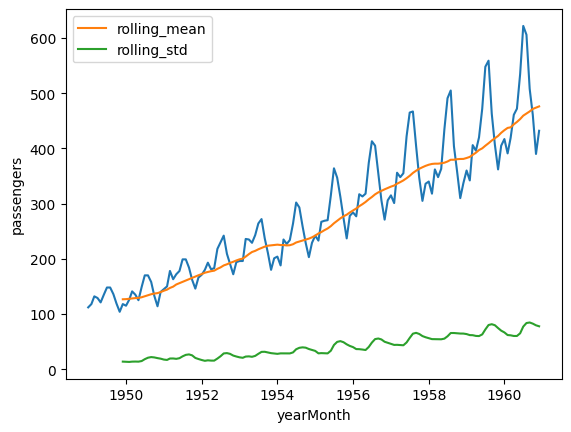

In [49]:
test_stationary(df,'passengers')

##### Time Shift

In [54]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [55]:
# Perform Time Shift

air_df['time_shift'] = air_df.passengers.shift()
air_df['time_shiftDiff'] = air_df["passengers"] - air_df['time_shift']
air_df.head()

C:\Users\user10\AppData\Local\Temp\ipykernel_12940\4011251102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['time_shift'] = air_df.passengers.shift()
C:\Users\user10\AppData\Local\Temp\ipykernel_12940\4011251102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['time_shiftDiff'] = air_df["passengers"] - air_df['time_shift']


,passengers,time_shift,time_shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_mean"] = df[var].rolling(window=12).mean()
C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_std"] = df[var].rolling(window=12).std()


Test Statistic                  -2.829267
p-value                          0.054213
Lags Used                       12.000000
Number of Observations Used    130.000000
dtype: float64
critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770


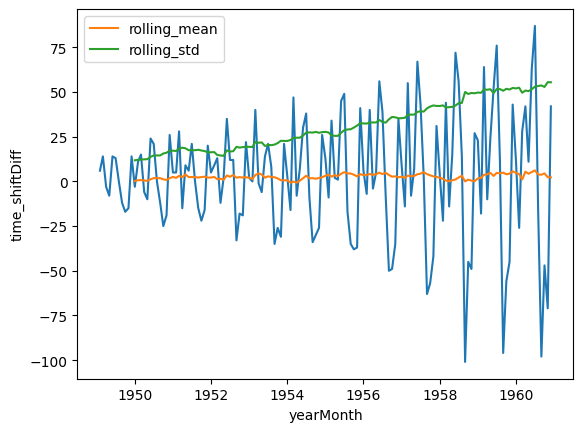

In [56]:
test_stationary(air_df.dropna(),'time_shiftDiff')

- Mean is shown constant but std is shown in trends, can perform next test

##### Log

In [58]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\user10\AppData\Local\Temp\ipykernel_12940\513687328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(df['passengers'])


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_mean"] = df[var].rolling(window=12).mean()
C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_std"] = df[var].rolling(window=12).std()


Test Statistic                  -1.717017
p-value                          0.422367
Lags Used                       13.000000
Number of Observations Used    130.000000
dtype: float64
critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770


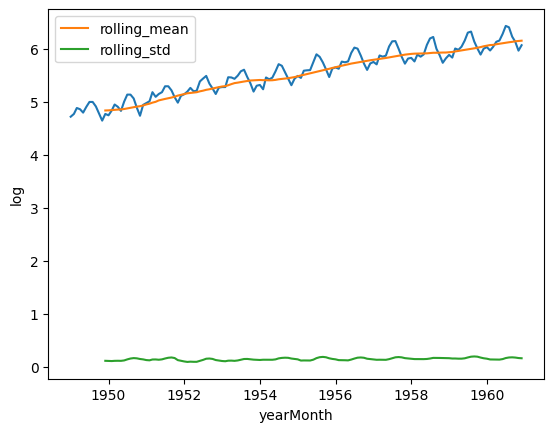

In [59]:
test_stationary(log_df,'log')

- std is constant, mean still show trends pattern, however cant conclude just based on graph
- examine the statistic also
- time shift p value is better
- p value(log) > p value(time shift)

##### SQRT

In [60]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])
sqrt_df.head()

C:\Users\user10\AppData\Local\Temp\ipykernel_12940\2486983579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_mean"] = df[var].rolling(window=12).mean()
C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_std"] = df[var].rolling(window=12).std()


Test Statistic                  -0.345854
p-value                          0.918754
Lags Used                       13.000000
Number of Observations Used    130.000000
dtype: float64
critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770


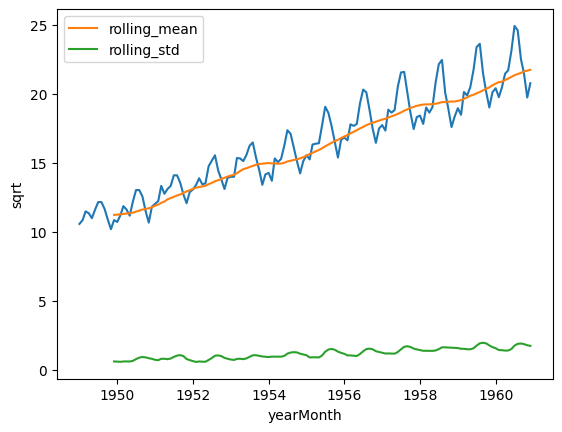

In [61]:
test_stationary(sqrt_df,'sqrt')

- not look much better

##### CUBE Root

In [62]:
cube_df = df[['passengers']]
cube_df['cbrt'] = np.cbrt(cube_df['passengers'])
cube_df.head()

C:\Users\user10\AppData\Local\Temp\ipykernel_12940\1766564430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cube_df['cbrt'] = np.cbrt(cube_df['passengers'])


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_mean"] = df[var].rolling(window=12).mean()
C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_std"] = df[var].rolling(window=12).std()


Test Statistic                  -0.810035
p-value                          0.816157
Lags Used                       13.000000
Number of Observations Used    130.000000
dtype: float64
critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770


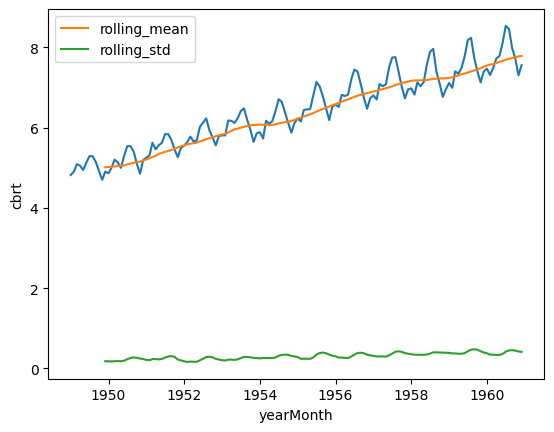

In [63]:
test_stationary(cube_df,'cbrt')

- not looks much different

##### Log & SQRT

In [64]:
log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2.head()

C:\Users\user10\AppData\Local\Temp\ipykernel_12940\2833411510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


,passengers,log,log_sqrt
yearMonth,,,
1949-01-01,112,4.718499,2.172211
1949-02-01,118,4.770685,2.184190
1949-03-01,132,4.882802,2.209706
1949-04-01,129,4.859812,2.204498
1949-05-01,121,4.795791,2.189929


Test Statistic                  -1.942528
p-value                          0.312326
Lags Used                       13.000000
Number of Observations Used    130.000000
dtype: float64
critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770


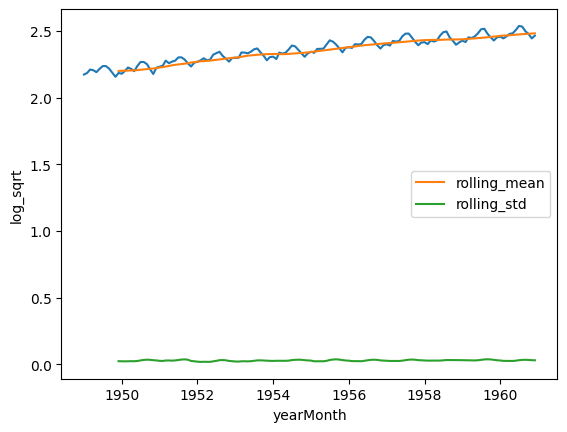

In [65]:
test_stationary(log_df2,'log_sqrt')

- p value for time shift is still better although the test statistic lower than critical value

##### LOG & SQRT & SHIFT

In [67]:
log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\user10\AppData\Local\Temp\ipykernel_12940\4190885055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_mean"] = df[var].rolling(window=12).mean()
C:\Users\user10\AppData\Local\Temp\ipykernel_12940\922274415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rolling_std"] = df[var].rolling(window=12).std()


Test Statistic                  -3.071912
p-value                          0.028703
Lags Used                       13.000000
Number of Observations Used    118.000000
dtype: float64
critical value 1%: -3.487022
critical value 5%: -2.886363
critical value 10%: -2.580009


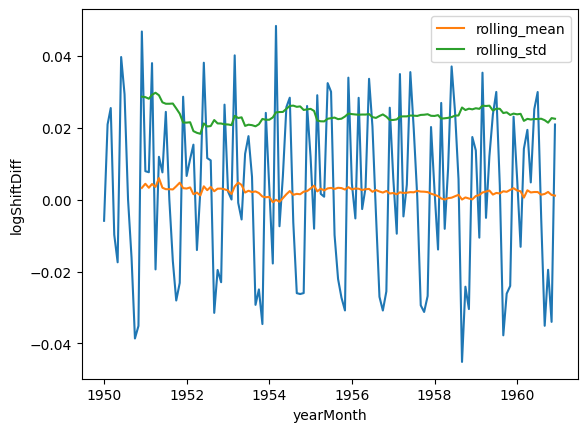

In [70]:
test_stationary(log_df2.dropna(),'logShiftDiff')

- p value is the best
- test statistic is near to critical value 1%
- use this to continue next step

#### Proceed to Next with original data

- start with base data to show the impact of make the data become stationary

ARIMA(p,d,q)                <br>
AR - Auto Regressive    - p <br>
I - Integrated          - d <br>
MA - Moving Average     - q

d - the value you shift in the data, shift 1 then is 1 shift 12 is 12  <br>
p - check partial autocorrelation fact function(**pacf**)                  <br>
q - check autocorrelation fact function(**acf**)                           <br>

In [127]:
airP = df[['passengers']].copy(deep=True)  # copy with remain original data unchanged
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [128]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

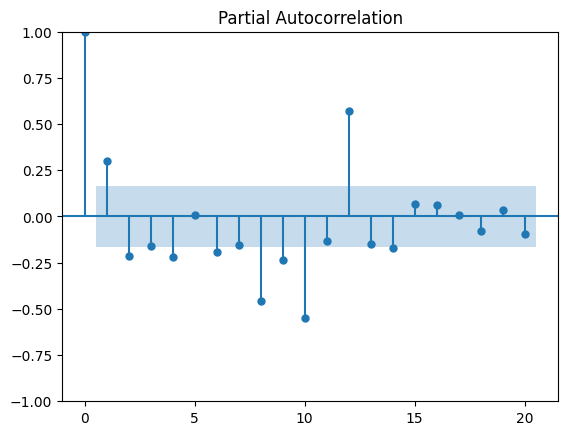

In [129]:
plot_pacf(airP['firstDiff'].dropna(), lags=20);

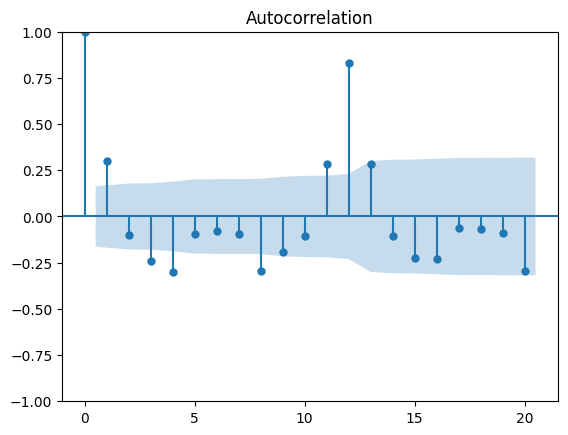

In [130]:
plot_acf(airP['firstDiff'].dropna(), lags=20);

- PACF - the points cover by shaded area that is exceed the shaded area value is point 1,2,...
- ACF - the points exceed shaded are is point 1,3,...
- simply choose point first for p and q
- p = 1, q = 3, d = 1

In [131]:
# split the data based on time based splitting
# ratio train 70%

train = airP[:round(0.7*len(airP))]
test = airP[round(0.7*len(airP)):]

In [132]:
train

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
...,...,...,...
1957-01-01,315,9.0,31.0
1957-02-01,301,-14.0,24.0
1957-03-01,356,55.0,39.0


In [133]:
model = ARIMA(train['passengers'], order=(1, 1, 3))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['arimaPred'] = predictions
airP.tail()

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='yearMonth', ylabel='passengers'>

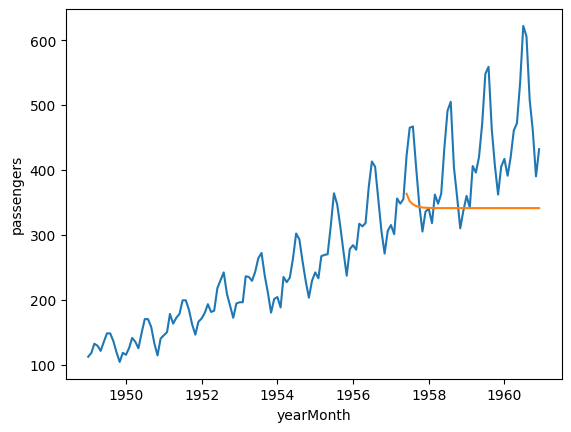

In [135]:
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='arimaPred')

In [136]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['passengers'], predictions))

111.1101033142743

In [137]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

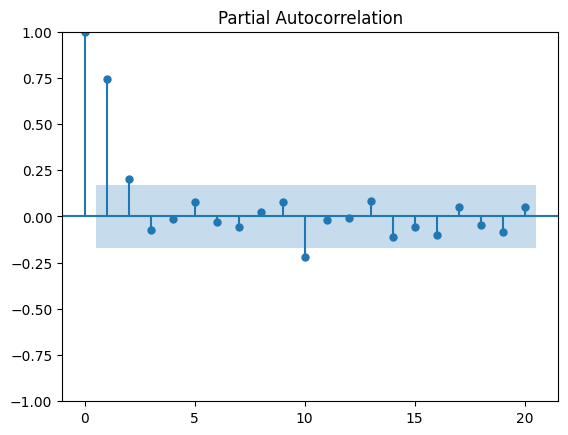

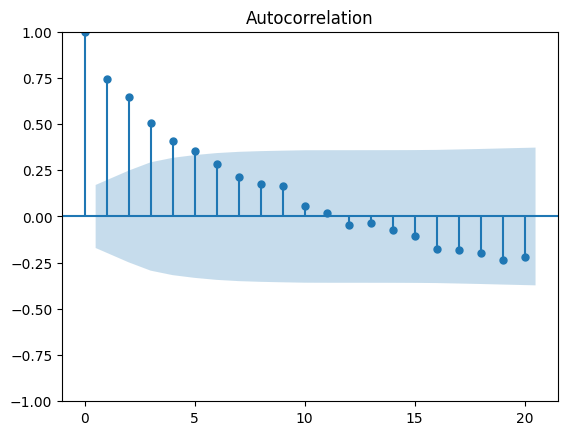

In [142]:
plot_pacf(airP['Diff12'].dropna(), lags=20);
plot_acf(airP['Diff12'].dropna(), lags=20);

- From ACF plot graph we can see there are 4 point exceed and we can use that 4 point combination for train SARIMAX 

In [146]:
model = SARIMAX(train['passengers'], order=(1, 1, 3), seasonal_order=(1, 1, 3, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['sarimaxPred'] = predictions

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

<Axes: xlabel='yearMonth', ylabel='passengers'>

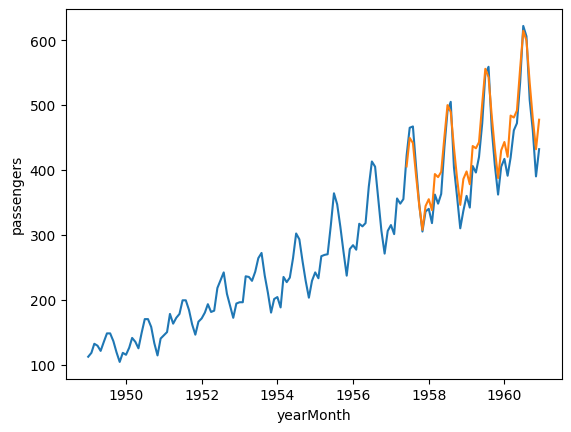

In [147]:
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')

In [148]:
np.sqrt(mean_squared_error(test['passengers'], predictions))

27.680579258807562

- can try with different p and q, d is time shift which is 1 or 12

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. Al

268941.6582039674

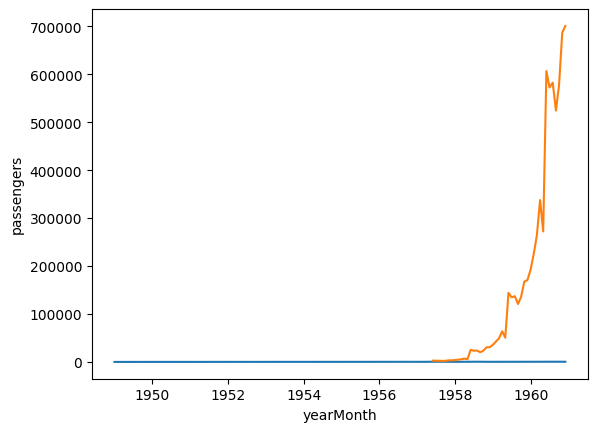

In [151]:
model = SARIMAX(train['passengers'], order=(1, 1, 3), seasonal_order=(1, 12, 3, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['sarimaxPred'] = predictions

sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')

np.sqrt(mean_squared_error(test['passengers'], predictions))

- D could never be 12 as it is terrible, put time shift = 1 
- change p or q

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


27.484096085321188

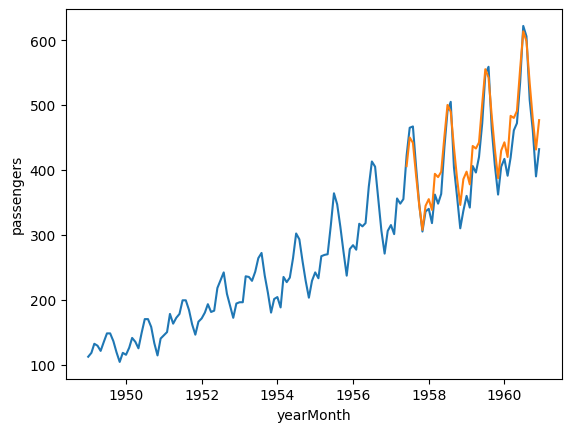

In [153]:
model = SARIMAX(train['passengers'], order=(1, 1, 3), seasonal_order=(2, 1, 2, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['sarimaxPred'] = predictions

sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')

np.sqrt(mean_squared_error(test['passengers'], predictions))

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


27.484096085321188

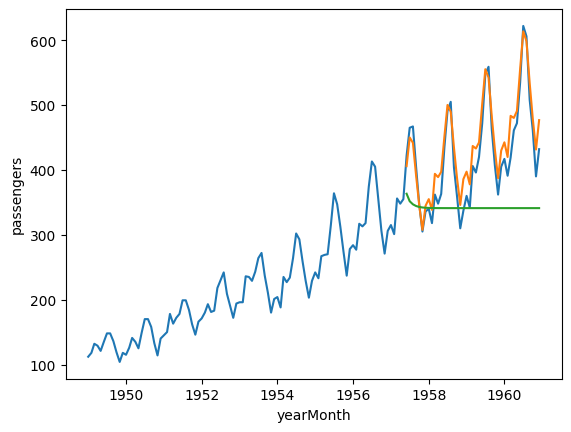

In [155]:
model = SARIMAX(train['passengers'], order=(1, 1, 3), seasonal_order=(2, 1, 2, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['sarimaxPred'] = predictions

sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')
sns.lineplot(data=airP, x=airP.index, y='arimaPred')

np.sqrt(mean_squared_error(test['passengers'], predictions))

In [159]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


<Axes: >

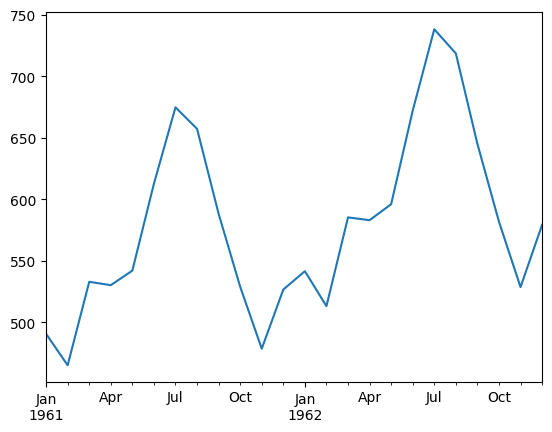

In [161]:
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot()

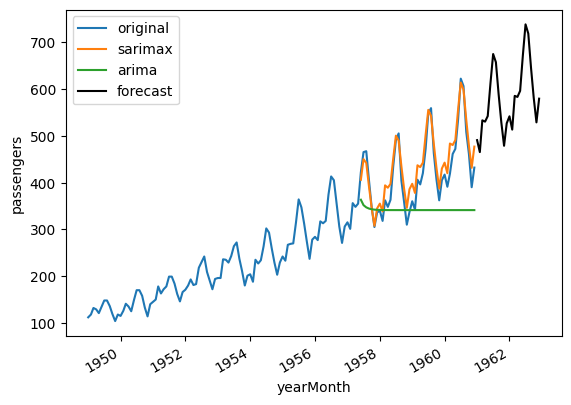

In [174]:
sns.lineplot(data=airP, x=airP.index, y='passengers', label='original')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred', label='sarimax')
sns.lineplot(data=airP, x=airP.index, y='arimaPred', label='arima')
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot(color='black', label='forecast')
plt.legend()

#### Proceed to next with data stationary

In [184]:
# airP = df[['passengers']].copy(deep=True)  # copy with remain original data unchanged
# airP['firstDiff'] = airP['passengers'].diff()
# airP['Diff12'] = airP['passengers'].diff(12)
# airP.head()

# Similarly get the firstDiff and Diff12
log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2['firstDiff'] = log_df2['log_sqrt'].diff()
log_df2['Diff12'] = log_df2['log_sqrt'].diff(12)
log_df2.head()

C:\Users\user10\AppData\Local\Temp\ipykernel_12940\2522821670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


,passengers,log,log_sqrt,logShiftDiff,firstDiff,Diff12
yearMonth,,,,,,
1949-01-01,112,4.718499,2.172211,NaN,NaN,NaN
1949-02-01,118,4.770685,2.184190,0.011979,0.011979,NaN
1949-03-01,132,4.882802,2.209706,0.025517,0.025517,NaN
1949-04-01,129,4.859812,2.204498,-0.005208,-0.005208,NaN
1949-05-01,121,4.795791,2.189929,-0.014569,-0.014569,NaN


In [186]:
log_df2.drop(columns=['log','log_sqrt','logShiftDiff'], inplace=True)
log_df2

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,0.011979,NaN
1949-03-01,132,0.025517,NaN
1949-04-01,129,-0.005208,NaN
1949-05-01,121,-0.014569,NaN
...,...,...,...
1960-08-01,606,-0.005143,0.015998
1960-09-01,508,-0.035088,0.018650
1960-10-01,461,-0.019523,0.025282


In [187]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

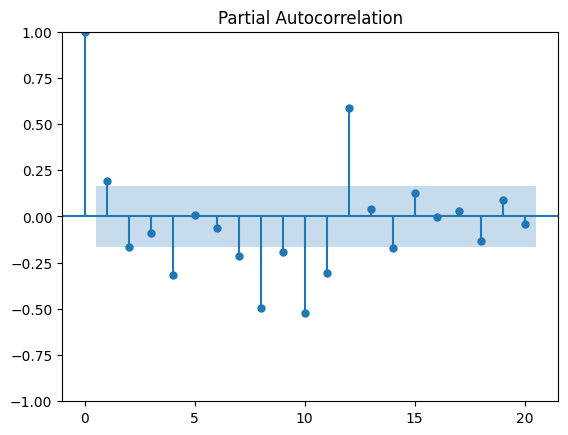

In [188]:
plot_pacf(log_df2['firstDiff'].dropna(), lags=20);

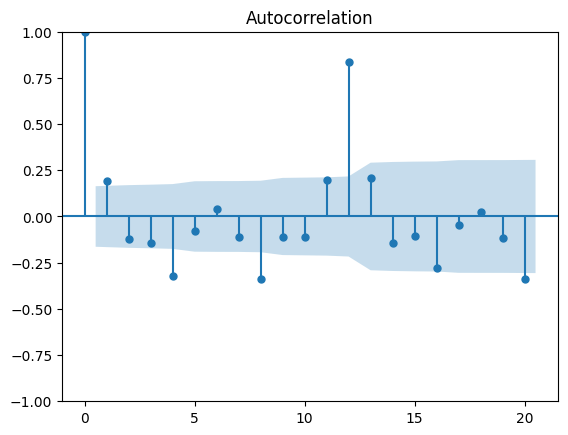

In [189]:
plot_acf(log_df2['firstDiff'].dropna(), lags=20);

In [190]:
# split the data based on time based splitting
# ratio train 70%

train = log_df2[:round(0.7*len(log_df2))]
test = log_df2[round(0.7*len(log_df2)):]

In [191]:
train

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,0.011979,NaN
1949-03-01,132,0.025517,NaN
1949-04-01,129,-0.005208,NaN
1949-05-01,121,-0.014569,NaN
...,...,...,...
1957-01-01,315,0.006051,0.021695
1957-02-01,301,-0.009496,0.017455
1957-03-01,356,0.034870,0.024054


In [196]:
model = ARIMA(train['passengers'], order=(1, 1, 3))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
log_df2['arimaPred'] = predictions
log_df2.tail()

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1960-08-01,606,-0.005143,0.015998,341.111333
1960-09-01,508,-0.035088,0.018650,341.111333
1960-10-01,461,-0.019523,0.025282,341.111333
1960-11-01,390,-0.034000,0.015299,341.111333
1960-12-01,432,0.020848,0.013134,341.111333


<Axes: xlabel='yearMonth', ylabel='passengers'>

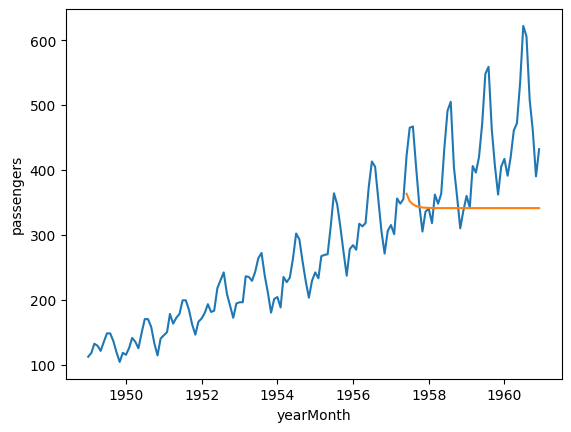

In [197]:
sns.lineplot(data=log_df2, x=log_df2.index, y='passengers')
sns.lineplot(data=log_df2, x=log_df2.index, y='arimaPred')

In [198]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['passengers'], predictions))

111.1101033142743

In [199]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

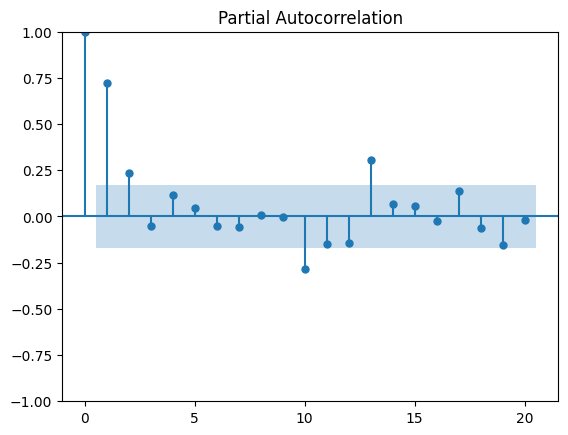

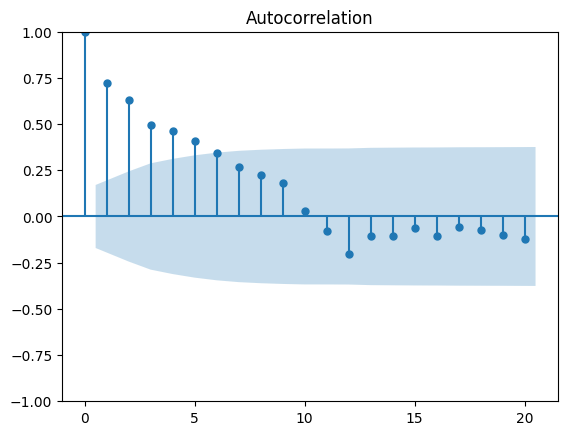

In [200]:
plot_pacf(log_df2['Diff12'].dropna(), lags=20);
plot_acf(log_df2['Diff12'].dropna(), lags=20);

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

27.680579258807562

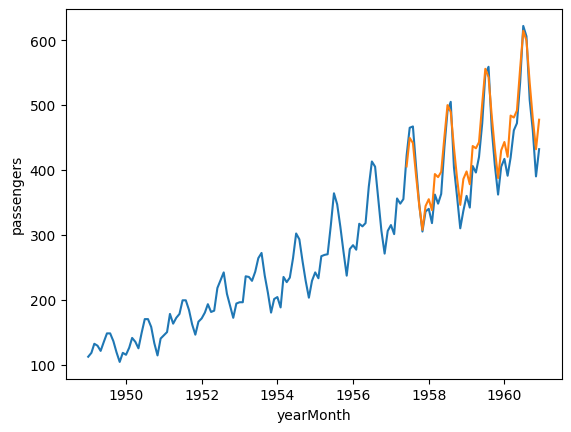

In [202]:
model = SARIMAX(train['passengers'], order=(1, 1, 3), seasonal_order=(1, 1, 3, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
log_df2['sarimaxPred'] = predictions

sns.lineplot(data=log_df2, x=log_df2.index, y='passengers')
sns.lineplot(data=log_df2, x=log_df2.index, y='sarimaxPred')

np.sqrt(mean_squared_error(test['passengers'], predictions))

c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user10\anaconda3\envs\time_series_forecasting\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


27.484096085321188

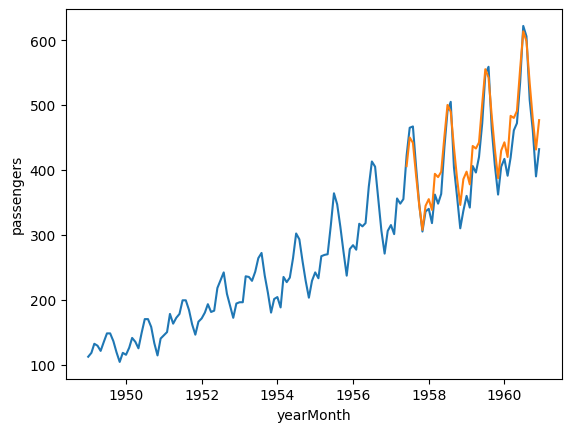

In [203]:
model = SARIMAX(train['passengers'], order=(1, 1, 3), seasonal_order=(2, 1, 2, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])
log_df2['sarimaxPred'] = predictions

sns.lineplot(data=log_df2, x=log_df2.index, y='passengers')
sns.lineplot(data=log_df2, x=log_df2.index, y='sarimaxPred')

np.sqrt(mean_squared_error(test['passengers'], predictions))

<Axes: >

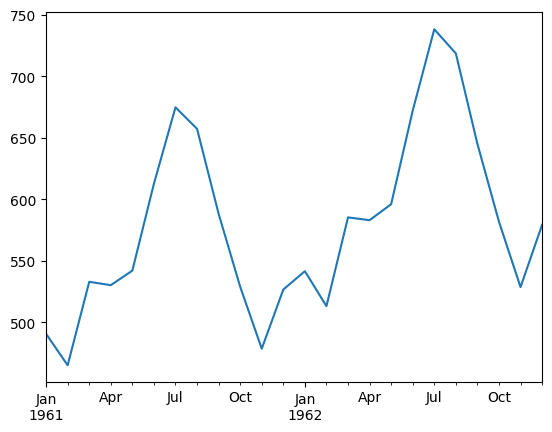

In [204]:
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot()

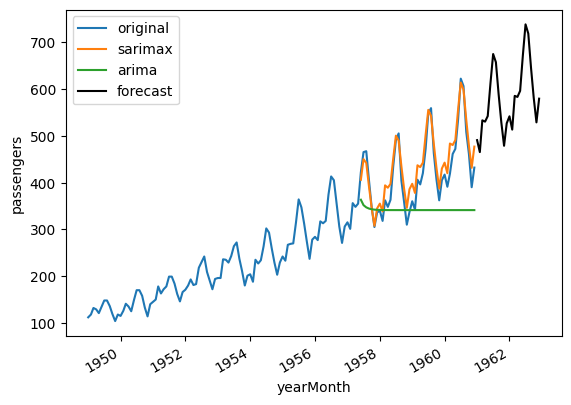

In [205]:
sns.lineplot(data=log_df2, x=log_df2.index, y='passengers', label='original')
sns.lineplot(data=log_df2, x=log_df2.index, y='sarimaxPred', label='sarimax')
sns.lineplot(data=log_df2, x=log_df2.index, y='arimaPred', label='arima')
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot(color='black', label='forecast')
plt.legend()

- the different data also not perform more better as the p value for timeshiff with logsrqtshift is not differ alot


In [206]:
'''TIME SHIFT
Test Statistic                  -2.829267
p-value                          0.054213
Lags Used                       12.000000
Number of Observations Used    130.000000
dtype: float64
critical value 1%: -3.481682
critical value 5%: -2.884042
critical value 10%: -2.578770
'''

'''LOG & SQRT & SHIFT
Test Statistic                  -3.071912
p-value                          0.028703
Lags Used                       13.000000
Number of Observations Used    118.000000
dtype: float64
critical value 1%: -3.487022
critical value 5%: -2.886363
critical value 10%: -2.580009
'''

'LOG & SQRT & SHIFT\nTest Statistic                  -3.071912\np-value                          0.028703\nLags Used                       13.000000\nNumber of Observations Used    118.000000\ndtype: float64\ncritical value 1%: -3.487022\ncritical value 5%: -2.886363\ncritical value 10%: -2.580009\n'